# Bloom Filters

### Querying

Suppose we have a large number of elements in our universe U. This could be anything ranging from books in a library to IP addresses stored in a server. Now suppose we want to implement a data structure that would help us in querying whether a particular element is present in the set or not, efficiently in terms of time and space. Since we have much lesser memory as compared to the size of our universe, we have to find a way to reduce the memory requirement for the querying data structure from $|U|$ to something less. Similarly, we can’t spend $O(|U|)$ time(a linear search) for querying as this would be too much. So, what are the possible solutions?
The first idea would be to use Hashing; which reduces the space used to $O(n log |U|)$ and the querying time to $O(n/m)$(where $n$ is the number of elements stored and $m$ is the size of the hash table), or to use a bit array which uses $O(|U|)$ space but queries in $O(1)$ time on average. But let us go beyond this and try and figure out if we can do better! Turns out, if we allow errors in querying with a small probability delta(a Monte Carlo algorithm), we can, using a data structure known as a Bloom Filter. 




### Bloom Filter:

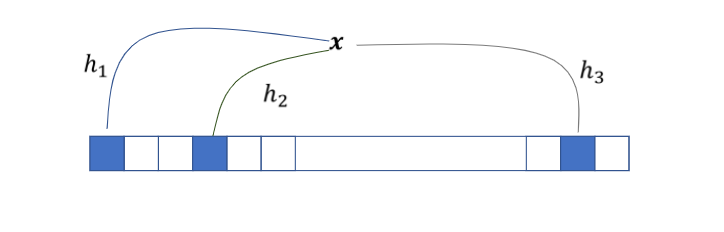

A bloom filter uses a bit array B of size, $m$, say, and $k$ hash functions. m and k are parameters which we will look at shortly. First let us take a look at the structure and working of the BF. For every element $x$ belonging to $U$, each hash function maps it to a particular location in the bit array. We start with all bits of B initialized to 0, i.e. $B[i]=0$ for all 1$\leq$i$\leq$m. 

**Insertion**:
For all $x⊆U$, we apply hash functions $h_{i}$ to $h_{k}$ on x and set the bit at the corresponding location in the BF B to 1, ie, for all 
$x⊆U$, $B[hi(x)]=1$.

**Lookup**:
For a particular element $x$, return PRESENT if for all $i=1…k$ $^$$B[hi(x)]$ is $1$. Else return ABSENT.





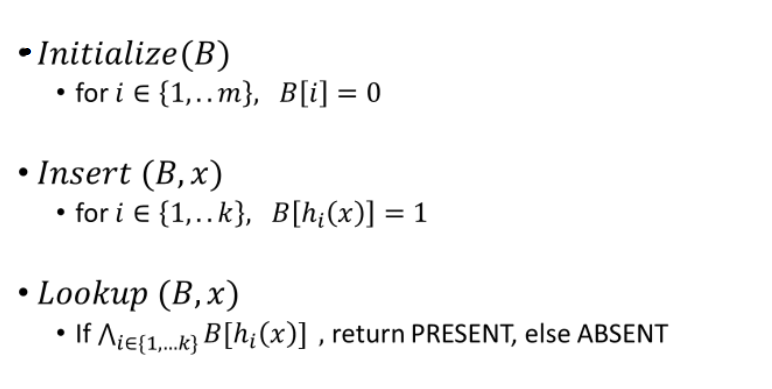

### Analysis

Now let us do an efficiency analysis for the BF. Clearly, when an element is actually present in the BF, the query for it will always return PRESENT, because all the locations in the bit array mapped by the hash functions for that element must have already been set to 1 when the element was inserted, therefore their AND is always going to return 1 which is what we want.

What about when a particular element is not actually present in the BF? Can the query return a false answer? Unfortunately, yes it can. Consider the following scenario: We insert three elements $x$, $y$ and $z$ in the BF. We use three hash functions $h_{1}$, $h_{2}$ and $h_{3}$. For $x$, locations $1$,$3$ and $5$ are set to $1$. For $y$, locations $4$,$6$ and $7$ are set to $1$ and for $z$, locations $6$, $4$ and $2$ are set to $1$. Now we query if an element w is present in the bit array or not. The hash functions map $w$ to locations $2$,$7$ and $5$. But these locations have the bits already turned on by insertion of other elements and therefore our query returns a false positive. We want to minimize this false positive, and we will do that by adjusting our parameters $k$ and $m$.

False Positive Analysis:
Let us now do an analysis of how the probability of returning a false positive depends on $m$ and $k$. Suppose we have $n$ elements inserted in the BF; size of the BF is $m$ and the number of hash functions is $k$. We perform a lookup for an element, say, $x$, which was not inserted. What is the probability that the query returns PRESENT?

To make our analysis easier, assume that the hash functions $h_{1}….h_{k}$ are independent of each other and they map elements uniform randomly to each position in B, ie., <br> 

$Pr[h_{i} =j]=1/m$,   for all positions $1$ $\leq$ $j$ $\leq$ $m$.

Now, the probability that $h_{i}(x)=0$ for any position $p=(1-1/m)^{kn}$,
which is roughly $e^-{kn/m}$. 

So, the probability that all positions for $x$ have a $1$ is 
                                        $(1-e^{-kn/m})^k$
                                        
This is exactly equal to the probability of returning a false positive for the BF. We aim to minimize this probability.

### Minimizing the false positive rate:

We have, 
<br>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $p= e^{-kn/m}$<br>
<br>&ensp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $=>k=-\frac{m}{n}log(p) $
<br>
And false positive probability=<br> &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$(1-p)^k$

<br>To make the calculations easier, we minimize the log of this function instead of the actual function

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$log(1-p)^k = klog(1-p)=-\frac{m}{n}log(p)log(1-p) $<br>

This is clearly minimized at $p=1/2$ or $k=\frac{mlog(2)}{n}$

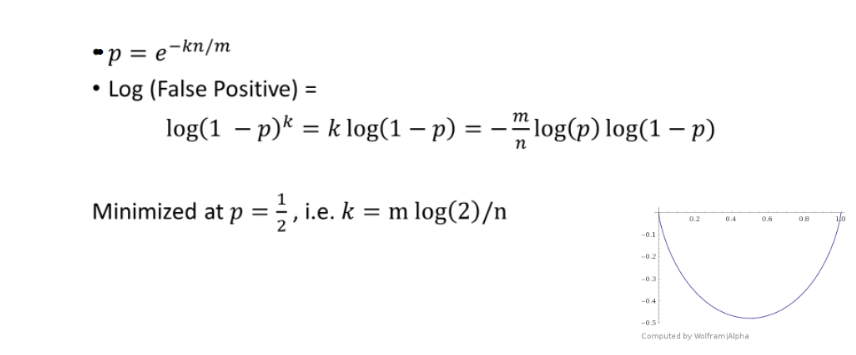Doing a few mathematical manipulations, we see that the false positive rate is minimized at $k=\frac{mlog2}{n}$. 

This now gives us an estimate of designing a Bloom Filter efficiently. If we want a false positive rate of delta, we set $m=\lceil \frac{log\frac{1}{\delta}n}{log^2 2} \rceil$


### Drawbacks and Extensions:
The chief drawback of Bloom Filter is that it does not allow for deletions. We can’t simply set the bits corresponding to the element being deleted to 0 as it can affect the lookup of other elements which might have bits clashing with that of the element being deleted.

In this light, several extensions of the Bloom Filter have been studied. One of them is the Counting Bloom filter, which maintains a small counter rather than a single bit. It maintains 4 bits per counter. Insertions require increasing the counter at a particular location(as mapped by the hash functions) by 1 and deletions decrease it by 1. Lookups are the same as the simple Bloom Filter. This Bloom Filter however, can also give false negatives but with a low probability.

### Applications:
Bloom Filters find a number of applications in cyber security, database lookups, bitcoins and much more. Browsers use a modified version of the Bloom Filter to decide whether a URL is potentially malicious. Many noteworthy servers that have to maintain a large amount of data often make use of Bloom Filters. Facebook, for example, uses bloom filters for typeahead search, to fetch friends and friends of friends to a user typed query. Bloom filters find applications in querying whenever small number of false positives are tolerable

# Streaming problem: distinct count

Let the universe be U, the number of distinct elements that you have seen is n. This n
is smaller than u, and the stream size is m(potentially much bigger than n). Distinct count has a variety of uses. A common use is websites and apps that are counting values.
For instance, 
U = all IP addresses
10.1.21.10, 10.93.28,1,…..,98.0.3.1,…..10.93.28.1…..

We can see here a list of IPs, 10.93.28.1 has appeared multiple times. We cannot really predict anything about the sequence in which this data comes. We have to estimate the number of distinct elements we have seen.


### Applications

Before going to how it actually works let us go through few applications - 

1. Suppose you're working on a document corpus analysis. And, when modeling this document corpus, you may need to build something known as k-grams, which is made of k consecutive bytes that appeared in your text data. You have to make k-grams out of it. And the document corpus you're reading is the source of your stream. This document corpus is massive, and in order to develop a natural language model, you'll need the number of distinct k-grams you've seen in the corpus, or at least an estimate of it. 
2. Similarly, let's say we're looking at telephone call logs to see who called whom, and some telecommunication company might be interested in knowing how many phone calls were made in the last month. Then you'll notice from the stream of these tuples that I look at only the first element of the tuple (caller, callee) and I want to examine how many different phone numbers show in at least one of the records as caller.


### Solutions


   Now, we will try to look at what are the naive solutions. The first naive solution is to store all the elements, sort them, and count the number of distinct elements. It takes a lot of space because you'll need O(n log(U)) space to store all the n elements if you are doing a sorting. 
Instead, if we store a hash map. Then you don't sort; for each new element that arrives, you check to see if it's already in a hash map. If it isn't there, insert it in the hashmap and increment the counter and if it is there then it isn't in this element. You could use a bit array of size U and change the bit to 1 in the respective place if it’s seen.


### Approximations

You obtain a much better result in less space. This type of solution, which will be a prevalent category of solutions, will be referred to as epsilon delta approximations. 
(∈, δ) − approximations

Assume the true solution is the actual number of distinct counts is n. Suppose the algorithm returns some $\hat{n}$. We name it epsilon delta approximation, if it satisfies the property
that (1 − ε)n ≤ $\hat{n}$ ≤ (1 + ε)n with probability (1 − δ). 


So, this probability over the randomness of the algorithm in our specific situation. In the case of distinct counts the randomness will be the choice of random hash functions.
As a result, the probability will be based on the random hash function selection.



### First Effort

Let’s look at this case, the number of distinct elements is n and the stream length is m where m is much bigger than n. The proposed algorithm is that suppose we are given a space S, sample S items from the stream. We have to find out the number of distinct elements in this set. Let, the number of distinct elements in this set is $\hat{n}$ and returns $\hat{n}$*(m/S) 
That is the estimated method will return here. 


Take this particular setting -  1,1,1,1,1,.......1,2,3,4,......n-1 (not a constant factor approximation)

The first m-n+1 element of the input sequence is element 1 which occurs multiple times. We have n-2 distinct elements here. Suppose, if m is much bigger than n. Take m equal to $n^{2}$.

So if we randomly choose n positions from O($n^{2}$) there is a maximum probability that the elements might repeat and therefore estimate n̂ in this case is 1 with high probability. It does not work because what may happen is, if you are sampling only this one particular element you cannot distinguish between the 2 cases. When we have 1 1 1 1 1 and 2 3 4 n-1, when we have 1 1 1 1 1 and then again more ones. These 2 cases we return the same answers. So therefore, this particular sampling algorithm cannot work.


